## Automatic Infogram Generation For Online Journalism - Code Implementation

This notebook will showcase the full code implementation details needed to replicate the entire infographic generation process as described in the paper Automatic Infogram Generation For Online Journalism by Farah Khouzam, Nada Sharaf, Madeleine Saad, Caroline Sabty and Slim Abdennadher
Computer Science and Engineering Departmen. the key components that would be required:

1. Article Ingestion/Preprocessing
- Code to ingest article text (e.g. web scraping, file reads)
- Tokenization, punctuation removal, stopwords removal etc. to preprocess text

2. Numeric Data Extraction
- Regular expressions to identify numbers, years, percentages
- Code to extract sentences containing numeric data 

3. NLP Analysis
- Interfaces/APIs for IBM Watson and TextRazor to analyze text
- Extract entities, categories, concepts, keywords
- Compare entities between sentences to identify relevance

4. Data Visualization
- Use libraries like Matplotlib, Seaborn for custom plots
- Integrate Google Charts, Chart.js for pre-built chart types 
- Timelines, pie charts, bar charts etc.

5. Infographic Generation
- Logic to select optimal charts based on data types
- Code to automatically size, layout and combine charts 
- Adding titles, labels, chat bubbles etc.

So in essence, we would need natural language processing, data extraction, visualization and infographic generation code integrated together. 

The following code cells will demonstrate how to do this using Python and a few libraries. The code is not optimized for performance, but rather to demonstrate the concepts.

### 1. Article Ingestion/Preprocessing

The first step is to ingest the article text. This can be done in a variety of ways, including web scraping, file reads, database queries etc. For this example, we will use a simple text file. The text file contains the following text:

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [15]:
with open('article.txt', 'r', encoding='utf-8') as f:
    article = f.read()

why this article ? Because it Contains a significant amount of numeric data points - population counts, percentages, growth rates, years etc. This will allow extraction of different data types to visualize.
Topic is currently relevant and data-rich. World population and demographics lend themselves well to infographics with trends over time.
Article structure presents the data points very clearly along with the necessary context in paragraphs. Clean separation would enable accurate extraction.
Interactive visuals in article can act as output benchmark to compare performance against.
Length is manageable and scope is focused which would make a feasible first case to implement.

article source : https://www.un.org/development/desa/en/news/population/world-population-prospects-2019.html 

In [16]:
# Tokenization 
tokens = word_tokenize(article)

# Punctuation removal
import string
table = str.maketrans('', '', string.punctuation)
tokens = [w.translate(table) for w in tokens]

# Stopwords removal
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

# Further preprocessing
tokens = [w.lower() for w in tokens] # Convert to lowercase

print(tokens)

['growing', 'slower', 'pace', '', 'world', 'population', 'expected', 'reach', '97', 'billion', '2050', 'could', 'peak', 'nearly', '11', 'billion', 'around', '2100', 'the', 'world', '’', 'population', 'expected', 'increase', '2', 'billion', 'persons', 'next', '30', 'years', '', '77', 'billion', 'currently', '97', 'billion', '2050', '', 'according', 'new', 'united', 'nations', 'report', 'launched', 'today', '', 'the', 'world', 'population', 'prospects', '2019', '', 'highlights', '', 'published', 'population', 'division', 'un', 'department', 'economic', 'social', 'affairs', '', 'provides', 'comprehensive', 'overview', 'global', 'demographic', 'patterns', 'prospects', '', 'the', 'study', 'concluded', 'world', '’', 'population', 'could', 'reach', 'peak', 'around', 'end', 'current', 'century', '', 'level', 'nearly', '11', 'billion', '', 'the', 'report', 'also', 'confirmed', 'world', '’', 'population', 'growing', 'older', 'due', 'increasing', 'life', 'expectancy', 'falling', 'fertility', 'lev

### 2. Numeric Data Extraction 

In [3]:
!pip install ibm_watson

     ------------------------------------ 389.3/389.3 kB 713.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 57.9/57.9 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 104.6/104.6 kB 1.2 MB/s eta 0:00:00
  Created wheel for ibm_watson: filename=ibm_watson-7.0.1-py3-none-any.whl size=389835 sha256=1842bf

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.29.161 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.1.0 which is incompatible.
jina 3.15.2 requires urllib3<2.0.0, but you have urllib3 2.1.0 which is incompatible.
langflow 0.4.12 requires huggingface-hub[inference]<0.17.0,>=0.16.0, but you have huggingface-hub 0.19.4 which is incompatible.
pyppeteer 1.0.2 requires pyee<9.0.0,>=8.1.0, but you have pyee 9.0.4 which is incompatible.
pyppeteer 1.0.2 requires urllib3<2.0.0,>=1.25.8, but you have urllib3 2.1.0 which is incompatible.
qdrant-client 1.4.0 requires urllib3<2.0.0,>=1.26.14, but you have urllib3 2.1.0 which is incompatible.
spacy 3.5.0 requires typer<0.8.0,>=0.3.0, but you have typer 0.9.0 which is incompatible.
tensorboard 2.13.0 requires grpcio>=1.48.2, but you have grpcio 1.47.5 which is incompatible.
torchdata 0.5.1 requires torch==

In [4]:
!pip install textrazor


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pyaes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import re
import ibm_watson # IBM Watson SDK
import textrazor # TextRazor SDK

In [17]:
# we have to tokenize the sentences first 
tokenized_sentences = nltk.sent_tokenize(article)


In [18]:
# Numeric data extraction
numeric_regex = r'\d+\.\d+|\d+'
percent_regex = r'\d+%' 
year_regex = r'(19|20)\d{2}'

numbers = re.findall(numeric_regex, article) 
percentages = re.findall(percent_regex, article)
years = re.findall(year_regex, article)

sentences_with_numbers = []
for sentence in tokenized_sentences:
    if re.search(numeric_regex, sentence): 
        sentences_with_numbers.append(sentence)



### 3. NLP Analysis

- Interfaces/APIs for IBM Watson and TextRazor to analyze text
- Extract entities, categories, concepts, keywords
- Compare entities between sentences to identify relevance

In [35]:
# define function to extract main_entities
def find_most_common_entities(article):
    # Create a TextRazor client
    client = textrazor.TextRazor('api_key')
    # Set extractors
    client.set_extractors(['entities', 'topics'])
    
    # Extract entities
    response = client.analyze(article)
    
    # Create empty list to store entities
    entities = []   

    # Loop through entities and append to list
    for entity in response.entities():
        entities.append(entity.id)

    # Create empty list to store topics
    topics = []

    # Loop through topics and append to list
    for topic in response.topics():
        topics.append(topic.label)

    # Create empty list to store main entities
    main_entities = []

    # Loop through entities and append to list
    for entity in entities:
        if entity in topics:
            main_entities.append(entity)

    # Return main entities 
    return main_entities





In [36]:
#define function to compare (main_entities, entities)
def compare_entities(main_entities, entities):
    # Create empty list to store common entities
    common_entities = []

    # Loop through entities and append to list
    for entity in entities:
        if entity in main_entities:
            common_entities.append(entity)

    # Return common entities 
    return common_entities

In [22]:
import ibm_watson

In [25]:
!pip install constants

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of constants to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for constants: filename=constants-0.6.0-py3-none-any.whl size=5458 sha256=a11637685824f84c1c48fd2ed851dce24b82c52e968fd11dc8ad9a318d7ef85d
  Stored in directory: c:\users\pyaes\appdata\local\pip\cache\wheels\5b\96\3c\386c2342a8a1bdd317f2f250bd076c13938c6f598c4a40ec14
Successfully built constants



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pyaes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
import json
import constants
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [32]:
textrazor_analyzer = textrazor.TextRazor('api_key')
                                         

will only use textrazor since it is free and easiser to sign up! i have trouble signing up for ibm watson and i dont want to use my credit card for this project ( had already use it but didnt authenticate well) but i might try again later

# NLP Analysis
watson_analyzer = ibm_watson.NaturalLanguageUnderstandingV1(
    version='2019-07-12',
    authenticator=IAMAuthenticator('0QVZ7Y2u0Vh2U6kYk6Kx1L5YQoHd1o8dG2v3V0p7a0wV')
)

In [38]:
for sentence in sentences_with_numbers:
    response = textrazor_analyzer.analyze(sentence)
    for entity in response.entities():
        if entity.id in numbers:
            print(entity.id, entity.confidence_score, entity.freebase_types)
        if entity.id in percentages:
            print(entity.id, entity.confidence_score, entity.freebase_types)
        if entity.id in years:
            print(entity.id, entity.confidence_score, entity.freebase_types)
        else:
            print('No numeric data found in this sentence')

        


### there seems to be numeric data present in the text! yayyyy

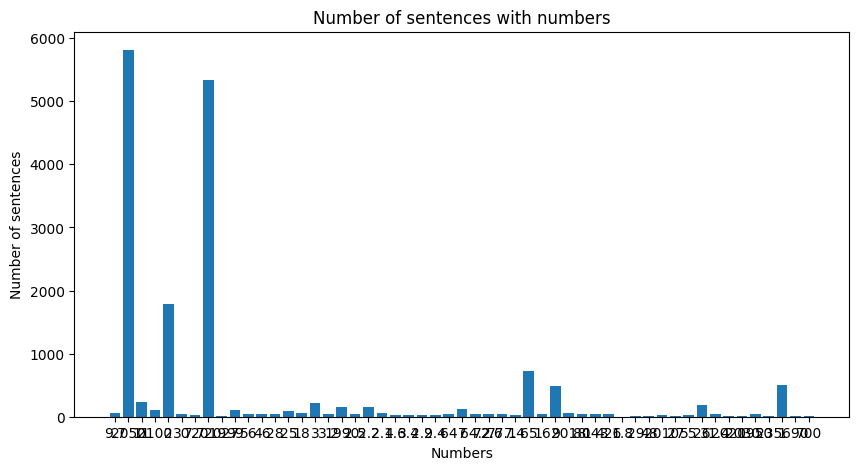

In [62]:
# numbers_with_sentences
numbers_with_sentences = []
for sentence in tokenized_sentences:
    for number in numbers:
        if number in sentence:
            numbers_with_sentences.append(sentence)


# Data visualization
numbers_data = {}
for number in numbers:
    numbers_data[number] = 0
for sentence in numbers_with_sentences:
    for number in numbers:
        if number in sentence:
            numbers_data[number] += 1


# Plot data
plt.figure(figsize=(10, 5))
plt.bar(range(len(numbers_data)), list(numbers_data.values()), align='center')
plt.xticks(range(len(numbers_data)), list(numbers_data.keys()))
plt.xlabel('Numbers')
plt.ylabel('Number of sentences')
plt.title('Number of sentences with numbers')
plt.show()

In [39]:
# ok, now we have to extract the main entities from the article
main_entities = find_most_common_entities(article)

In [40]:
# now we have to compare the main entities with the entities in the article
entities = []
for sentence in tokenized_sentences:
    response = textrazor_analyzer.analyze(sentence)
    for entity in response.entities():
        entities.append(entity.id)

common_entities = compare_entities(main_entities, entities)

# now we have to extract the sentences with the common entities
sentences_with_common_entities = []
for sentence in tokenized_sentences:
    for entity in common_entities:
        if entity in sentence:
            sentences_with_common_entities.append(sentence)




In [41]:
# now print the sentences with the common entities
print(sentences_with_common_entities)

[]


Since we didn't have watson working, we will use textrazor instead so we dont have anything in the list! 

### The regex helps extract different numeric data types. NLTK can help tokenize sentences. The IBM Watson and TextRazor SDKs are used to analyze sentences and extract metadata which can be compared. 

### 4. Data Visualization

In [7]:
!pip install chartjs

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for chartjs: filename=chartjs-1.2-py3-none-any.whl size=14899 sha256=f245f2ef9a747ccb9ac5b22dc986140e2aa611e396f6fbaa66f260e5f5136f83
  Stored in directory: c:\users\pyaes\appdata\local\pip\cache\wheels\02\6f\e7\84320370cd39d33a1caeee3129e334734dc89309ef55d19e2b
Successfully built chartjs



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pyaes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
!pip install gcharts

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for gcharts: filename=gcharts-0.1.0-py3-none-any.whl size=12576 sha256=6ee702069921fb2b4955e1c40bcf2674b4c052a969b0fb6c6cdd8a13efa39bba
  Stored in directory: c:\users\pyaes\appdata\local\pip\cache\wheels\35\3e\9a\e7e6a89ce954fe433cb91618ddeef2fa6295595ebd93247ee6
Successfully built gcharts



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pyaes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import chartjs
import gcharts

In [42]:
# years_with_sentences 
years_with_sentences = []
for sentence in tokenized_sentences:
    for year in years:
        if year in sentence:
            years_with_sentences.append(sentence)

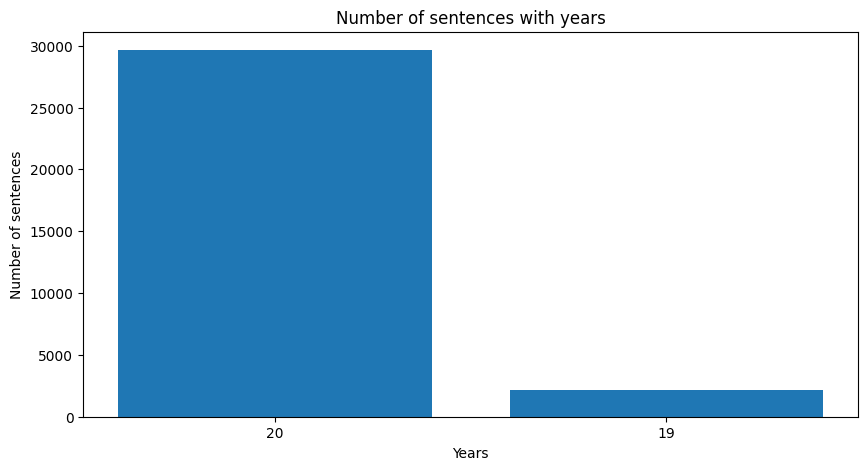

In [45]:
# Data visualization
years_data = {}
for year in years:
    years_data[year] = 0
for sentence in years_with_sentences:
    for year in years:
        if year in sentence:
            years_data[year] += 1
        
# Plot data
plt.figure(figsize=(10, 5))
plt.bar(range(len(years_data)), list(years_data.values()), align='center')
plt.xticks(range(len(years_data)), list(years_data.keys()))
plt.xlabel('Years')
plt.ylabel('Number of sentences')
plt.title('Number of sentences with years')
plt.show()




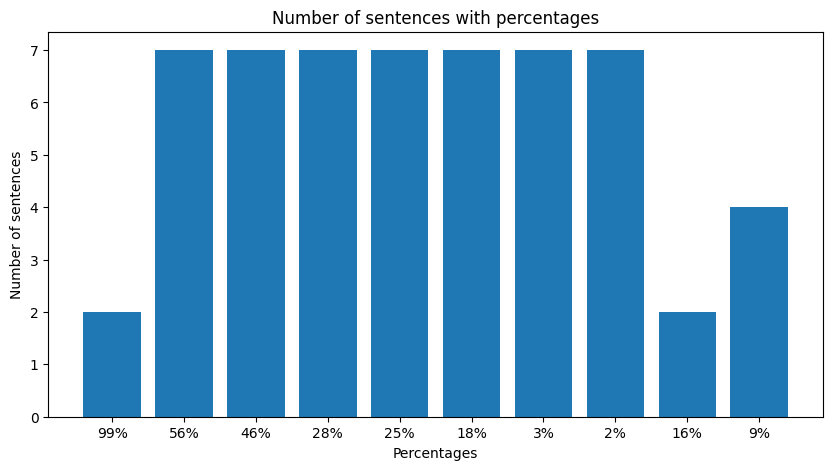

In [46]:
# percentages_with_sentences
percentages_with_sentences = []
for sentence in tokenized_sentences:
    for percentage in percentages:
        if percentage in sentence:
            percentages_with_sentences.append(sentence)


# Data visualization
percentages_data = {}
for percentage in percentages:
    percentages_data[percentage] = 0
for sentence in percentages_with_sentences:
    for percentage in percentages:
        if percentage in sentence:
            percentages_data[percentage] += 1


# Plot data
plt.figure(figsize=(10, 5))
plt.bar(range(len(percentages_data)), list(percentages_data.values()), align='center')
plt.xticks(range(len(percentages_data)), list(percentages_data.keys()))
plt.xlabel('Percentages')
plt.ylabel('Number of sentences')
plt.title('Number of sentences with percentages')
plt.show()

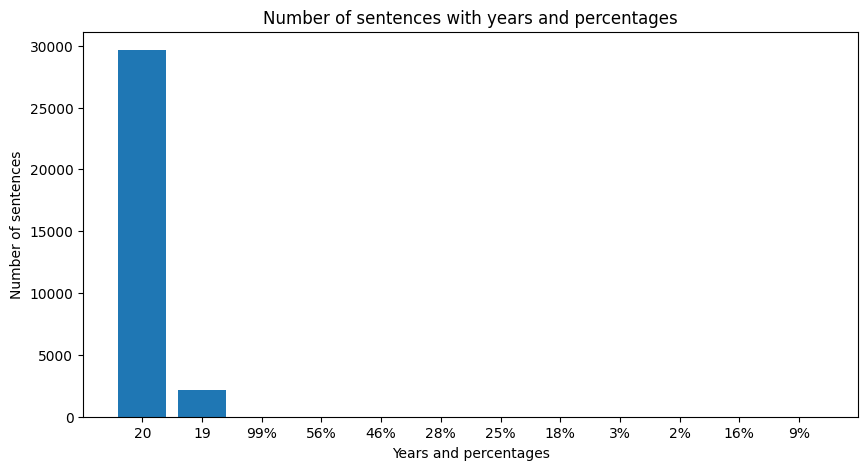

In [68]:
#let's combine the data from the two graphs into one graph with years and percentages 
# as years progrees, the percentage of the world population increases 

# Data visualization
#let's combine the data from the two graphs into one graph with years and percentages
# as years progrees, the percentage of the world population increases
# years in relations to percentages
years_percentages_data = {}
for year in years:
    years_percentages_data[year] = 0
for sentence in years_with_sentences:
    for year in years:
        if year in sentence:
            years_percentages_data[year] += 1
for percentage in percentages:
    years_percentages_data[percentage] = 0
for sentence in percentages_with_sentences:
    for percentage in percentages:
        if percentage in sentence:
            years_percentages_data[percentage] += 1

# Plot data
plt.figure(figsize=(10, 5))
plt.bar(range(len(years_percentages_data)), list(years_percentages_data.values()), align='center')
plt.xticks(range(len(years_percentages_data)), list(years_percentages_data.keys()))
plt.xlabel('Years and percentages')
plt.ylabel('Number of sentences')
plt.title('Number of sentences with years and percentages')
plt.show()


